#### NLP Amazon Man's Perfum Reviews

In [ ]:
# import of related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
import nltk
import re
from warnings import filterwarnings

In [6]:
#  Reading amazon.xlsx data
data = pd.read_excel("Villan Perfume for men 100ml.xlsx")
df = data.copy()
df.head()

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant
0,4.0 out of 5 stars,Amala Maria,https://www.amazon.in/gp/customer-reviews/R13B...,Good,Must buy,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 24 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
1,4.0 out of 5 stars,A SRIDHAR,https://www.amazon.in/gp/customer-reviews/RE4P...,Perfume,Not very specific okay,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 17 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
2,4.0 out of 5 stars,Sumedh,https://www.amazon.in/gp/customer-reviews/R3DA...,It's an average perfume considering the budget,The key scents of this perfume are orange blos...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 12 March 2023,29 people found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
3,4.0 out of 5 stars,HARISH CHANDAR CHINNATHAMBI,https://www.amazon.in/gp/customer-reviews/R3MH...,Good perfume and provides longer frangrance,Good product and has the raw zeal taste liked ...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 18 April 2023,One person found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
4,3.0 out of 5 stars,Dr Apurva dutta roy,https://www.amazon.in/gp/customer-reviews/R1ZQ...,Damage,Notch of spray is damaged ..perfume smell is g...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 15 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...


###### About the data

In [7]:
df.shape

(2930, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Star-rating           2930 non-null   object
 1   Name                  2930 non-null   object
 2   Reviewer Profile Url  2930 non-null   object
 3   Review Title          2930 non-null   object
 4   Review Content        2865 non-null   object
 5   images                614 non-null    object
 6   profile icon          2930 non-null   object
 7   Date                  2930 non-null   object
 8   helpful               2930 non-null   object
 9   verified              2832 non-null   object
 10  variant               2930 non-null   object
dtypes: object(11)
memory usage: 251.9+ KB


In [9]:
df.isnull().sum()

Star-rating                0
Name                       0
Reviewer Profile Url       0
Review Title               0
Review Content            65
images                  2316
profile icon               0
Date                       0
helpful                    0
verified                  98
variant                    0
dtype: int64

In [10]:
# Star-rating value is object type in the dataset, we changing it to numeric.


df["Star-rating"] = df["Star-rating"].str.extract(r"(\d+\.\d+)")
df["Star-rating"]= df["Star-rating"].astype(float)
df.head()

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant
0,4.0,Amala Maria,https://www.amazon.in/gp/customer-reviews/R13B...,Good,Must buy,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 24 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
1,4.0,A SRIDHAR,https://www.amazon.in/gp/customer-reviews/RE4P...,Perfume,Not very specific okay,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 17 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
2,4.0,Sumedh,https://www.amazon.in/gp/customer-reviews/R3DA...,It's an average perfume considering the budget,The key scents of this perfume are orange blos...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 12 March 2023,29 people found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
3,4.0,HARISH CHANDAR CHINNATHAMBI,https://www.amazon.in/gp/customer-reviews/R3MH...,Good perfume and provides longer frangrance,Good product and has the raw zeal taste liked ...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 18 April 2023,One person found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...
4,3.0,Dr Apurva dutta roy,https://www.amazon.in/gp/customer-reviews/R1ZQ...,Damage,Notch of spray is damaged ..perfume smell is g...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 15 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...


In [11]:
# Date column contains country and date as object type.We parsing this content and creating new columns.


df_date=df["Date"].str.split(" ",expand=True)[[2,4,5,6]]
df_date.columns = ["Country", "Day", "Month", "Year"]
df =pd.merge(df,df_date, left_index=True, right_index=True)
df.head()

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant,Country,Day,Month,Year
0,4.0,Amala Maria,https://www.amazon.in/gp/customer-reviews/R13B...,Good,Must buy,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 24 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,24,May,2023
1,4.0,A SRIDHAR,https://www.amazon.in/gp/customer-reviews/RE4P...,Perfume,Not very specific okay,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 17 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,17,May,2023
2,4.0,Sumedh,https://www.amazon.in/gp/customer-reviews/R3DA...,It's an average perfume considering the budget,The key scents of this perfume are orange blos...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 12 March 2023,29 people found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,12,March,2023
3,4.0,HARISH CHANDAR CHINNATHAMBI,https://www.amazon.in/gp/customer-reviews/R3MH...,Good perfume and provides longer frangrance,Good product and has the raw zeal taste liked ...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 18 April 2023,One person found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,18,April,2023
4,3.0,Dr Apurva dutta roy,https://www.amazon.in/gp/customer-reviews/R1ZQ...,Damage,Notch of spray is damaged ..perfume smell is g...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 15 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,15,May,2023


In [13]:
 #There are 65 empty values in the “Review Content” .Empty “Review Content” has “Review Title”,too. 
# We add the “Review Title” to the “Review Content”, because “Review Title” contain information

df[df["Review Content"].isnull()]

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant,Country,Day,Month,Year
7,3.0,Soumyadeep sen,https://www.amazon.in/gp/customer-reviews/R2HZ...,smell was not so good,NaN,https://m.media-amazon.com/images/I/81C+PZUvEx...,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 18 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,18,May,2023
97,5.0,Nikhil juneja,https://www.amazon.in/gp/customer-reviews/R3JT...,Fragrance,NaN,https://m.media-amazon.com/images/I/61-2179gv4...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 30 March 2023,One person found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,30,March,2023
126,5.0,Sourav srivastava,https://www.amazon.in/gp/customer-reviews/RQ0D...,Go for it☺❤,NaN,https://m.media-amazon.com/images/I/71FZsRvdBs...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 15 March 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,15,March,2023
149,5.0,Dheeraj kumar,https://www.amazon.in/gp/customer-reviews/RRL4...,It's awesome 👍👍👍👍,NaN,https://m.media-amazon.com/images/I/71-uSR4iju...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 11 March 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,11,March,2023
175,3.0,Ashish kumar,https://www.amazon.in/gp/customer-reviews/R1Y8...,Perfume,NaN,https://m.media-amazon.com/images/I/61UA6zbJAl...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 27 October 2022,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,27,October,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,5.0,Aman jaiswal,https://www.amazon.in/gp/customer-reviews/R3BW...,Long-lasting,NaN,https://m.media-amazon.com/images/I/61CW7KNIkN...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 27 September 2021,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,27,September,2021
2755,5.0,ANSHUMAN THAKUR,https://www.amazon.in/gp/customer-reviews/R1OS...,best one try once,NaN,https://m.media-amazon.com/images/I/81kZZHlUAb...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 29 September 2021,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,29,September,2021
2822,4.0,Ranveer singh,https://www.amazon.in/gp/customer-reviews/R1F0...,Awesome fragrance 😍😌,NaN,https://m.media-amazon.com/images/I/61b7BxJfnI...,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 17 October 2021,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,17,October,2021
2825,5.0,Ashik K M,https://www.amazon.in/gp/customer-reviews/RM98...,👌,NaN,https://m.media-amazon.com/images/I/71Hs2eSsrC...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 28 September 2022,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,28,September,2022


In [14]:
df_review_content_na = df[df["Review Content"].isnull()]

df_review_content_na["Review Title"]

7        smell was not so good
97                   Fragrance
126                Go for it☺❤
149          It's awesome 👍👍👍👍
175                    Perfume
                 ...          
2719              Long-lasting
2755         best one try once
2822      Awesome fragrance 😍😌
2825                         👌
2858        Experience is good
Name: Review Title, Length: 65, dtype: object

In [15]:
# Adding Review Title to Review Content
df["Review Content"].fillna(df_review_content_na["Review Title"],inplace=True)
df["Review Content"].isnull().sum()

0

###### Exploratory Data Analysis ( EDA )¶

       Country  Ratio
India     2930  100.0
##########################################


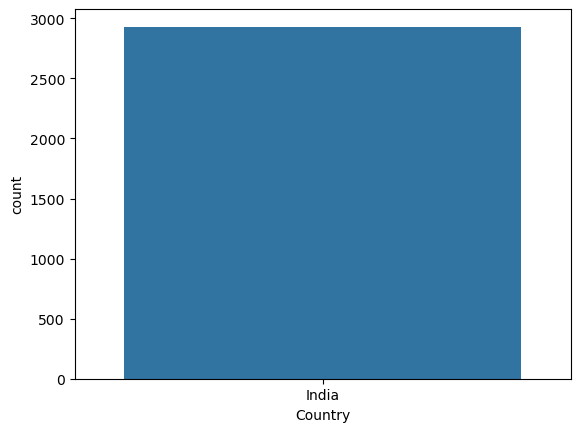

           Month      Ratio
October      413  14.095563
November     327  11.160410
September    304  10.375427
December     248   8.464164
August       234   7.986348
July         230   7.849829
March        226   7.713311
May          209   7.133106
February     203   6.928328
April        202   6.894198
January      168   5.733788
June         166   5.665529
##########################################


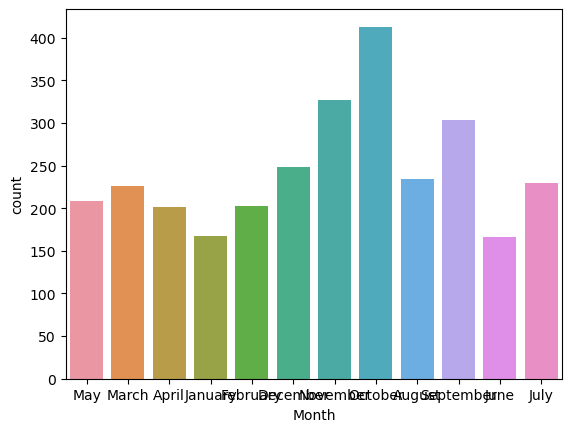

      Year      Ratio
2021  1283  43.788396
2022  1059  36.143345
2020   361  12.320819
2023   227   7.747440
##########################################


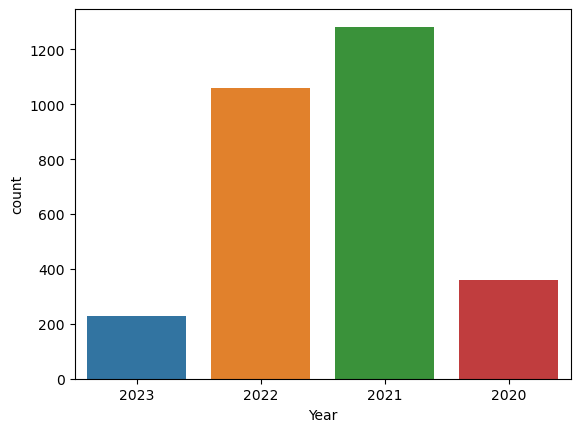

In [16]:
#  Analysis of Categorical Variables  

import seaborn as sns

cat_cols=['Country', 'Month', 'Year']
num_cols=["polarity_score","Star-rating"]

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)

##### Sentiment Analysis
* Text Preprocessing
* Text Visualization
* Sentiment Analysis
* Feature Engineering
* Sentiment Modeling

In [17]:
# 1. Text Preprocessing


def remove_emojis(text):
    """Removes emojis from the given text"""
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emojilar
                               u"\U0001F300-\U0001F5FF"  # simvollar va diagrammalar
                               u"\U0001F680-\U0001F6FF"  # transport va turli joylar
                               u"\U0001F1E0-\U0001F1FF"  # davlat bayroqlari
                               u"\U00002702-\U000027B0"  # dingbats
                               u"\U000024C2-\U0001F251"  # alamatchilik belgilari
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def text_prep(dataframe, text_col):
    # Removes emojis from the given text
    dataframe[text_col] = dataframe[text_col].apply(lambda x: remove_emojis(x))
    # The pattern matches both "<br>" and "<br />" tags with or without whitespace characters between the tag name and the closing angle bracket.
    dataframe[text_col] = dataframe[text_col].str.replace('<br\s*\/?>', ' ')
    #  Normalizing Case Folding ( convert text to lowercase )
    dataframe[text_col] = dataframe[text_col].str.lower()
    # Punctuations
    dataframe[text_col] = dataframe[text_col].str.replace('[^\w\s]', '')
    # Numbers
    dataframe[text_col] = dataframe[text_col].str.replace('\d', '')

    return dataframe[text_col]

text_prep(df, "Review Content")

C:\Users\23261657414\AppData\Local\Temp\ipykernel_11468\765889167.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[text_col] = dataframe[text_col].str.replace('<br\s*\/?>', ' ')
C:\Users\23261657414\AppData\Local\Temp\ipykernel_11468\765889167.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[text_col] = dataframe[text_col].str.replace('[^\w\s]', '')
C:\Users\23261657414\AppData\Local\Temp\ipykernel_11468\765889167.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[text_col] = dataframe[text_col].str.replace('\d', '')


0                                                must buy
1                                  not very specific okay
2       the key scents of this perfume are orange blos...
3       good product and has the raw zeal taste liked ...
4       notch of spray is damaged perfume smell is goo...
                              ...                        
2925    quality perfume gifted to a friend and also pu...
2926                                             good buy
2927                                             valuable
2928    i love fragrance the most long last for  day p...
2929    perfect  try atleast once\nyou will see a lot ...
Name: Review Content, Length: 2930, dtype: object

In [19]:
# Stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')

df["Review Content"] = df["Review Content"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["Review Content"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\23261657414\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


0                                                must buy
1                                           specific okay
2       key scents perfume orange blossom top note top...
3       good product raw zeal taste liked manhood last...
4       notch spray damaged perfume smell good boughti...
                              ...                        
2925    quality perfume gifted friend also purchased l...
2926                                             good buy
2927                                             valuable
2928    love fragrance long last day packaging awesome...
2929        perfect try atleast see lot heads turn around
Name: Review Content, Length: 2930, dtype: object

In [20]:
# Rarewords

temp_df = pd.Series(' '.join(df['Review Content']).split()).value_counts()
temp_df = (df['Review Content']).apply(lambda x : pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
temp_df.columns=["words","frequency"]

temp_df.sort_values(by="frequency", ascending=False)

,words,frequency
5,perfume,1024.0
41,good,922.0
103,fragrance,806.0
6,smell,656.0
78,product,649.0
...,...,...
1990,summers,1.0
1989,opens,1.0
425,agin,1.0
1987,longness,1.0


In [21]:
temp_df.info() 
temp_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530 entries, 0 to 3529
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   words      3530 non-null   object 
 1   frequency  3530 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.3+ KB


words        3530
frequency     116
dtype: int64

In [22]:
# remove words with frequency 1

temp_df=temp_df[temp_df["frequency"] <=1]
temp_df = list(temp_df["words"])

df['Review Content'] = df['Review Content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in temp_df))

In [25]:
# Lemmatization

nltk.download('wordnet')
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\23261657414\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
nltk.download('omw-1.4')
df['Review Content'] = df['Review Content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review Content']

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\23261657414\AppData\Roaming\nltk_data...


0                                                must buy
1                                           specific okay
2       key scent perfume orange blossom top note top ...
3       good product raw taste liked last longer coupl...
4       notch spray damaged perfume smell good give da...
                              ...                        
2925    quality perfume gifted friend also purchased l...
2926                                             good buy
2927                                             valuable
2928    love fragrance long last day packaging awesome...
2929         perfect try atleast see lot head turn around
Name: Review Content, Length: 2930, dtype: object

In [29]:
#delete meaningless words

del_ = ["hai", "hr", "one","st", "mnt","le","u","h","ho","jata","jo","ye","ki","rha","ka","r","ml",
        "ya","de","eau","i"]

df['Review Content'] = df['Review Content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in del_))

##### Text Visualization

In [30]:
# Wordcloud

word_cloud_text = df['Review Content'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_cloud_text.columns = ["Words", "wf"]

word_cloud_text.sort_values("wf", ascending=False)

,Words,wf
6,perfume,1109.0
38,good,922.0
89,fragrance,823.0
4,smell,820.0
71,product,677.0
...,...,...
896,social,2.0
895,medium,2.0
891,stock,2.0
890,pleasantly,2.0


<Figure size 1500x1300 with 0 Axes>

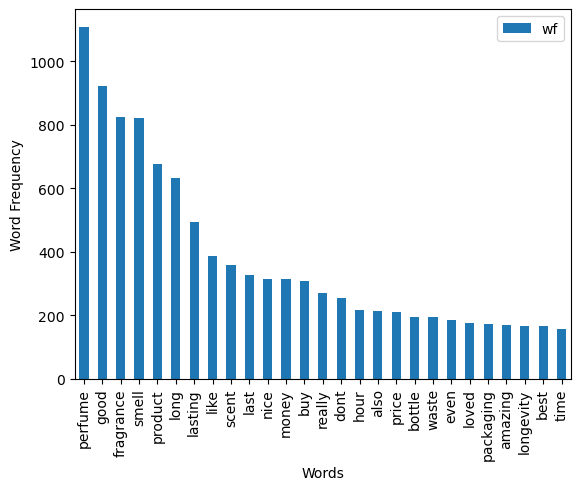

In [31]:
plt.figure(figsize=(15,13))
word_cloud_text[word_cloud_text["wf"] > 150].sort_values("wf", ascending=False).plot.bar(x="Words", y="wf")
plt.xlabel("Words")
plt.ylabel("Word Frequency")
plt.show()

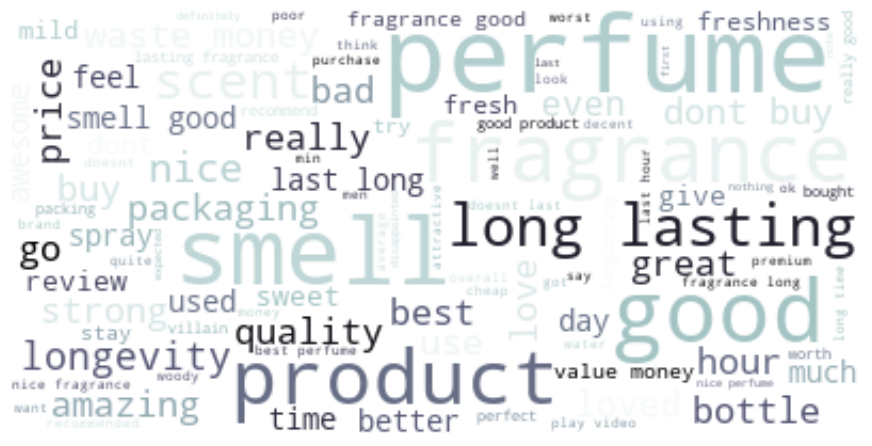

In [32]:
text = " ".join(i for i in df["Review Content"])

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white",
                      colormap='bone',
                      #normalize_plurals=True,
                      #repeat=True,
                      #min_font_size=10
                      ).generate(text)
plt.figure(figsize=(11,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###### Sentiment Analysis

In [33]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df["polarity_score"] = df["Review Content"].apply(lambda x: sia.polarity_scores(x)["compound"])

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\23261657414\AppData\Roaming\nltk_data...


,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant,Country,Day,Month,Year,polarity_score
0,4.0,Amala Maria,https://www.amazon.in/gp/customer-reviews/R13B...,Good,must buy,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 24 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,24,May,2023,0.0000
1,4.0,A SRIDHAR,https://www.amazon.in/gp/customer-reviews/RE4P...,Perfume,specific okay,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 17 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,17,May,2023,0.2263
2,4.0,Sumedh,https://www.amazon.in/gp/customer-reviews/R3DA...,It's an average perfume considering the budget,key scent perfume orange blossom top note top ...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 12 March 2023,29 people found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,12,March,2023,0.9828
3,4.0,HARISH CHANDAR CHINNATHAMBI,https://www.amazon.in/gp/customer-reviews/R3MH...,Good perfume and provides longer frangrance,good product raw taste liked last longer coupl...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 18 April 2023,One person found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,18,April,2023,0.6908
4,3.0,Dr Apurva dutta roy,https://www.amazon.in/gp/customer-reviews/R1ZQ...,Damage,notch spray damaged perfume smell good give da...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 15 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,15,May,2023,-0.4939


###### Feature Engineering

In [34]:
df["sentiment_label"] = df["Review Content"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant,Country,Day,Month,Year,polarity_score,sentiment_label
0,4.0,Amala Maria,https://www.amazon.in/gp/customer-reviews/R13B...,Good,must buy,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 24 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,24,May,2023,0.0000,neg
1,4.0,A SRIDHAR,https://www.amazon.in/gp/customer-reviews/RE4P...,Perfume,specific okay,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 17 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,17,May,2023,0.2263,pos
2,4.0,Sumedh,https://www.amazon.in/gp/customer-reviews/R3DA...,It's an average perfume considering the budget,key scent perfume orange blossom top note top ...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 12 March 2023,29 people found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,12,March,2023,0.9828,pos
3,4.0,HARISH CHANDAR CHINNATHAMBI,https://www.amazon.in/gp/customer-reviews/R3MH...,Good perfume and provides longer frangrance,good product raw taste liked last longer coupl...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 18 April 2023,One person found this helpful,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,18,April,2023,0.6908,pos
4,3.0,Dr Apurva dutta roy,https://www.amazon.in/gp/customer-reviews/R1ZQ...,Damage,notch spray damaged perfume smell good give da...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 15 May 2023,0,Verified Purchase,Pattern Name: PerfumeStyle Name: 100 ml (Pack ...,India,15,May,2023,-0.4939,neg


In [35]:
df.groupby("sentiment_label")["Star-rating"].mean()

sentiment_label
neg    1.969940
pos    3.925983
Name: Star-rating, dtype: float64

In [36]:
df["sentiment_label"].value_counts()

pos    1932
neg     998
Name: sentiment_label, dtype: int64

<Figure size 1100x900 with 0 Axes>

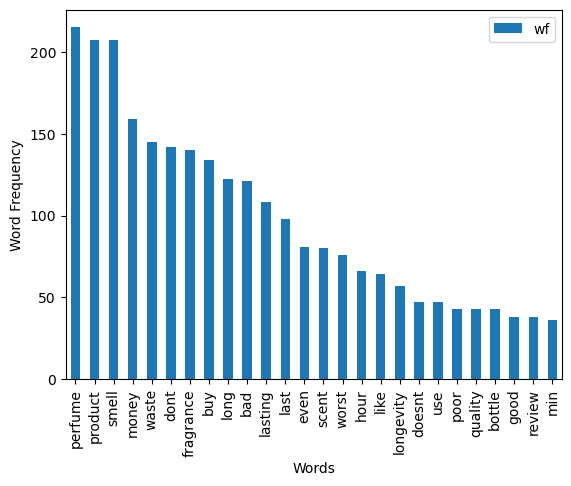

In [37]:
# negative words

df_neg = df[df["sentiment_label"] == "neg"]
text_neg = " ".join(i for i in df_neg["Review Content"])


text_neg_bar = df_neg["Review Content"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
text_neg_bar.columns = ["Words", "wf"]


plt.figure(figsize=(11,9))
text_neg_bar[text_neg_bar["wf"] > 35].sort_values("wf", ascending=False).plot.bar(x="Words", y="wf")
plt.xlabel("Words")
plt.ylabel("Word Frequency")
plt.show()

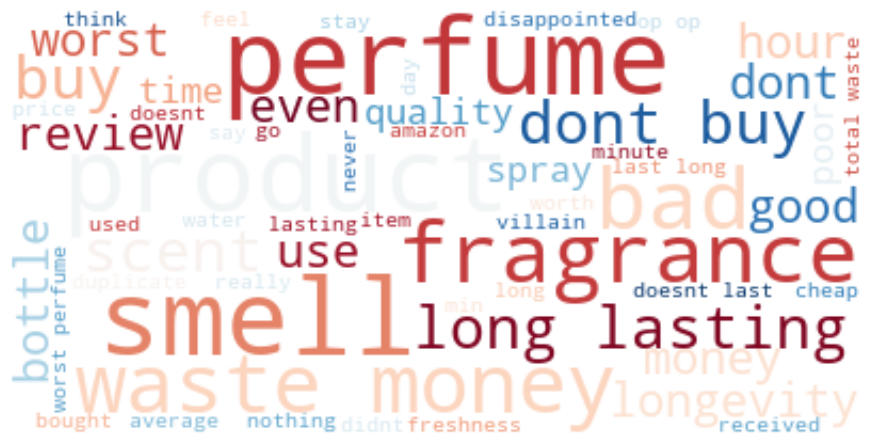

In [38]:
# negative word cloud

wordcloud = WordCloud(max_font_size=50,
                      max_words=120,
                      background_color="white",
                      colormap='RdBu',
                      normalize_plurals = True,
                      repeat = True,
                      min_font_size = 10).generate(text_neg)
plt.figure(figsize=(11,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 1500x1300 with 0 Axes>

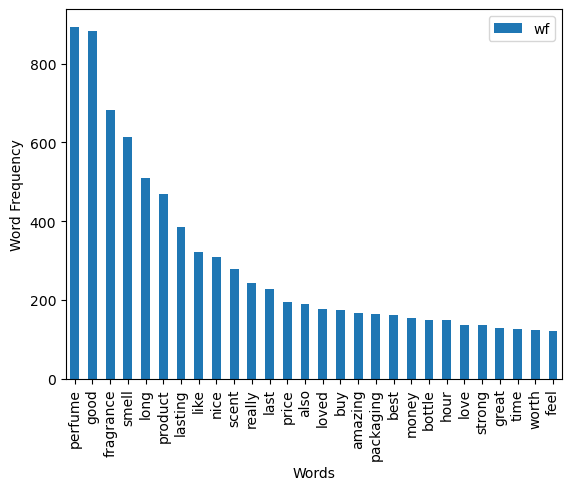

In [39]:
# positive words


df_pos = df[df["sentiment_label"] == "pos"]
text_pos = " ".join(i for i in df_pos["Review Content"])


text_pos_bar = df_pos["Review Content"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
text_pos_bar.columns = ["Words", "wf"]


plt.figure(figsize=(15,13))
text_pos_bar[text_pos_bar["wf"] > 120].sort_values("wf", ascending=False).plot.bar(x="Words", y="wf")
plt.xlabel("Words")
plt.ylabel("Word Frequency")
plt.show()

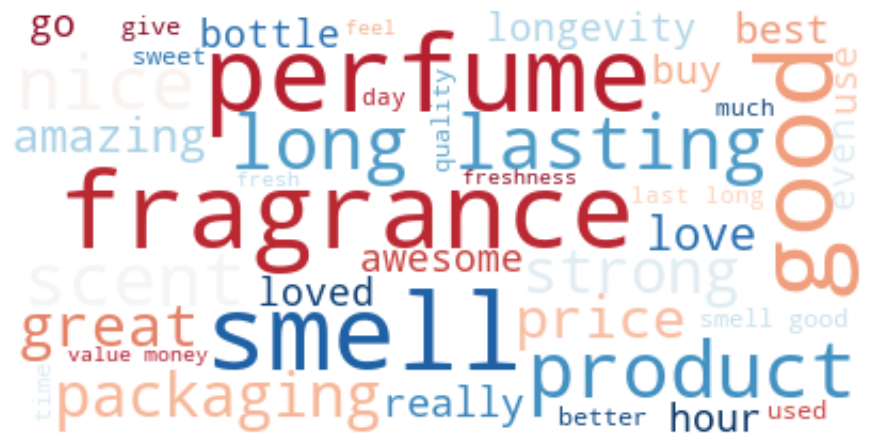

In [40]:
# positive word cloud

wordcloud = WordCloud(
                      max_font_size=50,
                      max_words=120,
                      background_color="white",
                      colormap='RdBu',
                      normalize_plurals = True,
                      repeat = True,
                      min_font_size = 10).generate(text_pos)

plt.figure(figsize=(11,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###### Sentiment Modeling

In [41]:
# sentiment_label  tagged  as positive and negative. We

df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

y = df["sentiment_label"]
X = df["Review Content"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [42]:
# we use  tf-ifd and word frequency method

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_word_vectorizer = TfidfVectorizer().fit(X_train)

X_tf_idf_word_train = tf_idf_word_vectorizer.transform(X_train)
X_tf_idf_word_test = tf_idf_word_vectorizer.transform(X_test)

In [43]:
# Random Forests with tf-ifd Method

from sklearn.metrics import classification_report


rf_model=RandomForestClassifier().fit(X_tf_idf_word_train, y_train)

y_pred=rf_model.predict(X_tf_idf_word_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       234
           1       0.95      0.92      0.94       499

    accuracy                           0.91       733
   macro avg       0.90      0.91      0.90       733
weighted avg       0.92      0.91      0.91       733



In [44]:
cross_val_score(rf_model, X_tf_idf_word_test, y_test, cv=5, n_jobs=-1).mean()

0.8908955362967104

In [45]:
# Hyperparameter Optimization

rf_model = RandomForestClassifier()

rf_params = {"max_depth": [8, None],
 "max_features": [7, "sqrt"],
 "min_samples_split": [2, 5, 8],
 "n_estimators": [100, 200, 300, 500]}

rf_best_grid = GridSearchCV(rf_model,
                           rf_params,
                                cv=5,
                           n_jobs=-1,
                   verbose=1).fit(X_tf_idf_word_train, y_train)

rf_best_grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 500}

In [46]:
# we build final model 

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_tf_idf_word_train, y_train)

In [47]:
cross_val_score(rf_final, X_tf_idf_word_test, y_test, cv=5, n_jobs=-1).mean()

0.8731525486907092

In [48]:
new_review = pd.Series(df["Review Content"][5])
new_review = tf_idf_word_vectorizer.transform(new_review)
rf_final.predict(new_review)

array([1])

In [49]:
data["Review Content"][5]

"It's good but personally not Cup of tea"